# Práctica 1
# Gregorio Aarón Meza Ramos

In [1]:
#Cargando las librerias necesarias para la práctica
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import math 

## Ejercicio 1
Johannes Kepler fue el pionero en el estudio de las órbitas planetarias. Las tres leyes que rigen el movimiento de los astros alrededor del Sol, las enunció él. La primera declara que todos los planetas tienen una órbita elíptica en donde la estrella se ubica en uno de los focos. La segunda dicta que la línea recta que une a la estrella con el planeta recorre distancias iguales en tiempos iguales. Finalmente, y derivada de las anteriores, la tercera Ley de Kepler trata de la proporcionalidad entre el cuadrado del tiempo que tarda en dar un planeta una vuelta alrededor del Sol y el cubo del radio orbital entre ellos. Lo anterior se resume en la siguiente fórmula:
$$
T^2=cR^3
$$
en donde T es el período del movimiento de traslación (en años) y R es el radio orbital (en unidades astronómicas (AU)). Considere los siguientes datos:


| **Planeta** |**Radio Orbital**|**Periodo orbital**|  
|:------------|:----------------|:------------------|
| **Mercurio**|0.38             |0.241              |
| **Venus**   |0.72             |0.615              | 
| **Tierra**  |1.00             |1.00               |
| **Marte**   |1.52             |1.88               | 
| **Júpiter** |5.20             |11.86              | 
| **Saturno** |9.54             |29.46              |
| **Urano**   |19.22            |84.01              | 
| **Neptuno** |30.06            |164.79             |

a) En 1618, cuando Kepler enunció su resultado, ni Urano ni Neptuno habían sido descubiertos. Ajuste el modelo en este caso, es decir, calcule la constante c mas conveniente.</br>
b) Una vez descubiertos Urano y Neptuno, se conoció su período por simple observación. Usando la constante c, calcule su radio orbital. ¿Coincide con el de la tabla?</br>
c) Adapte el modelo para que, dada la distancia orbital, calcule el período. Interprete su modelo (para esto, puede investigar también sobre el trabajo de J. Kepler).

### Solución


#### a)
Lo que vamos a hacer para poder aproximar la constante $c$ de la tercera Ley de Kepler es tomar el cociente del Periodo Orbital y su respectivo Radio Orbital por planeta. Recordar que sólo usaremos los planetas de Mercurio hasta Urano. Este proceso nos dará un valor de $c$ por planeta, cuando ya tengamos todos los valores de $c$, haremos un promedio de estos


In [2]:
# Cragamos los datos en listas
radio_orbital = [0.38,0.72,1.00,1.52,5.20,9.54] #Contiene los datos de radio orbital por planeta
periodo_orbital = [0.241,0.615,1.00,1.88,11.86,29.46] #Contiene los datos de Periodo orbital por planeta
#Usando lista comprimida, llenamos una nueva lista que contiene todos los valores de c que calculamos con el respectivo
# cociente de periodo orbital y radio orbital por planeta
c_values  = [periodo_orbital[i]/radio_orbital[i] for i in range(len(radio_orbital))] 
c_values

[0.6342105263157894,
 0.8541666666666667,
 1.0,
 1.2368421052631577,
 2.2807692307692307,
 3.0880503144654092]

In [3]:
'''
En este bloque de código obtenemos el promedio de los valores de c calculados arriba
'''
suma = 0.0
for c in c_values:
    suma = suma + c
cantidad_elementos = len(c_values)
promedio_c = suma/cantidad_elementos

In [4]:
print(f'El valor de c que se ajusta a nuestro modelo es {promedio_c}')

El valor de c que se ajusta a nuestro modelo es 1.5156731405800423


In [5]:
'''
Aquí definimos la función que va a funcionar como nuestro modelo, donde ya incluimos el valor de c que obtuvimos arriba
'''
def law_kepler(x):
    return math.sqrt(promedio_c * (x**3))

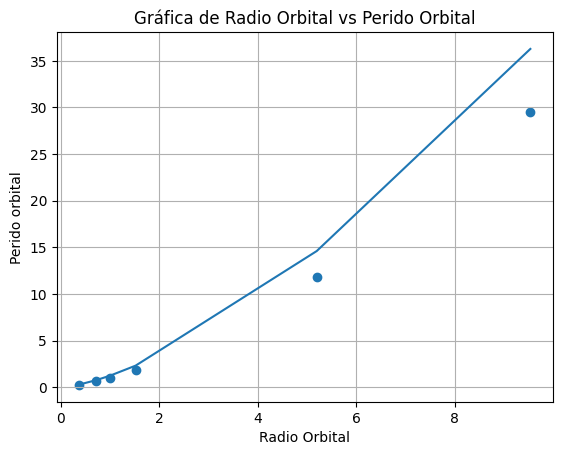

In [6]:
#Graficación de los datos y ajuste del Modelo 
fig, ax = plt.subplots()
ax.scatter(radio_orbital, periodo_orbital)
ax.set_xlabel('Radio Orbital')
ax.set_ylabel('Perido orbital')
plt.plot(radio_orbital, [law_kepler(i) for i in radio_orbital])
plt.title('Gráfica de Radio Orbital vs Perido Orbital')
plt.grid()
plt.show()

#### b)


In [7]:
#Calculos para llegar al Radio Orbital de Urano y Neptuno
def Law_KeplerT(T):
    return math.pow(T**2/promedio_c,1/3)

In [8]:
print(f'El Radio Orbital aproximado de Urano es {Law_KeplerT(84.01)}')
print(f'El Radio Orbital aproximado de Neptuno es {Law_KeplerT(164.79)}')

El Radio Orbital aproximado de Urano es 16.698808013181612
El Radio Orbital aproximado de Neptuno es 26.166886521566013


Con los cálculos hechos arriba notamos que los radios orbitales de Neptuno y Urano no coinciden con los de la tabla. Y era de esperarse que no coincidan por que lo que hicimos para aproximar la constante presenta un error relativo entre los valores originales y los del modelo ajustado.

#### c)

Sabemos que
$$ T^2=cR^3$$
Entonces al despejar la $T$ obtenemos que:
$$ T = \sqrt{cR^{3}}$$
**Interpretación del Modelo**


Basicamente este modelo nos explica que para cualquier planeta, el cuadrado de su periodo orbital es directamente proporcional al cubo de la longitud del semieje mayor  de su óbita elíptica. Desde el punto de vista Matemático, el semieje mayor de una elipse es la mitad del diámetro más largo, que es equivalente a la distancia media de un objeto que gira alrededor de otro.

## Ejercicio 2
Tenemos los siguientes datos acerca de un tipo particular de pinos que acaba de ser descubierto.

| **Diametro del tronco</br> (pulgadas)** |**Altura del árbol </br> (pies)**|
|:---------------------------------------:|:-------------------------------:|
|17                                       |190                              |
|19                                       |250                              |
|20                                       |320                              |
|22                                       |510                              |
|23                                       |570                              |    
|25                                       |710                              |
|28                                       |1130                             |
|31                                       |1410                             |
|32                                       |1230                             |
|33                                       |1870                             |
|36                                       |1920                             |
|37                                       |2050                             |
|38                                       |2520                             |
|39                                       |2590                             |
|41                                       |2940                             |

Un experto en Biología propone dos posibles modelos, pues no está seguro cuál podría adaptar a los datos obtenidos. Uno de los modelos es $y \propto (x+ 2)$, mientras que el otro es $y \propto x^b$ para alguna constante $b$.</br>

a) Ajuste ambos modelos (i.e., encuentre los parámetros) y diga cuál ajusta mejor a los datos.</br>
b) Una vez seleccionado el modelo, calcule la altura de un pino de dicha especie cuyo diámetro es de 65 centímetros. </br>
c) Interprete su modelo.

### Solución:

### a)
Para ajustar el modelo $y \propto x^b$ lo que hicimos fue pensar en la siguiente expresión
$$ y = k_1x^{b}\implies \frac{y}{x^{b} } = k_1$$
Y en nuestro modelo $y$ hace referencia a la altura del árbol y $x$ al diametro del Tronco. De esta manera el siguiente paso sería calcular el cociente de nuestros datos e ir variando $b$ hasta encontrar la que se ajuste más a nuestros datos.

Cabe recordar que por cada $b$ con las que trabajemos obtendremos el promedio nuestras **k's**

In [9]:
'''
Aquí definimos dos funciones que son modelos a los que les ajustaremos nuestros datos
'''
#Modelo 1
def test1(x, a):
    return a *(x  + 2)
#Modelo 2
def test2(x, b,c):
    return b*((x)**c)

In [10]:
'''
Creamos listas de python donde almacenamos diametros y alturas de los árboles
'''
diametro = [17,19,20,22,23,25,28,31,32,33,36,37,38,39,41]
altura = [190,250,320,510,570,710,1130,1410,1230,1870,1920,2050,2520,2590,2940]

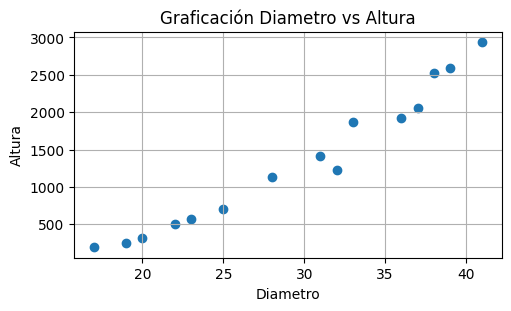

In [11]:
'''
Vista Preliminar de los datos
Simplemente para observar como se comportan los datos. Con la mera observación podemos notar que el ajuste de los datos
no será lineal
'''
fig, ax = plt.subplots(figsize=(5, 3.0), layout='constrained') 
ax.scatter(diametro, altura)
ax.set_xlabel('Diametro')
ax.set_ylabel('Altura')
plt.title('Graficación Diametro vs Altura')
plt.grid()
plt.show()

In [13]:
'''#Transformamos nuestros listas a numpy arrays para una mejor manipulación de los datos
'''
d = np.array(diametro)
h = np.array(altura)
'''
La linea de abajo nos crea un numpy array que empieza en 0, e incrementa con 0.25 y para en 3.5
Elegimos estos valores por que de la visualización de los datos de arriba apreciamos que la gráfica podría tener un expo
nente entre 1 y 3
'''
b = np.arange(start=0, stop=3.5, step=0.25)

In [14]:
#Calculamos las constantes que son candidatas a ajustar nuestro modelo o aproximarlo lo mejor posible
k1 = np.mean(h/d**b[0])
k2 = np.mean(h/d**b[1])
k3 = np.mean(h/d**b[2])
k4 = np.mean(h/d**b[3])
k5 = np.mean(h/d**b[4])
k6 = np.mean(h/d**b[5])
k7 = np.mean(h/d**b[6])
k8 = np.mean(h/d**b[7])
k9 = np.mean(h/d**b[8])
k10 = np.mean(h/d**b[9])
k11 = np.mean(h/d**b[10])
k12 = np.mean(h/d**b[11])
k13 = np.mean(h/d**b[12])

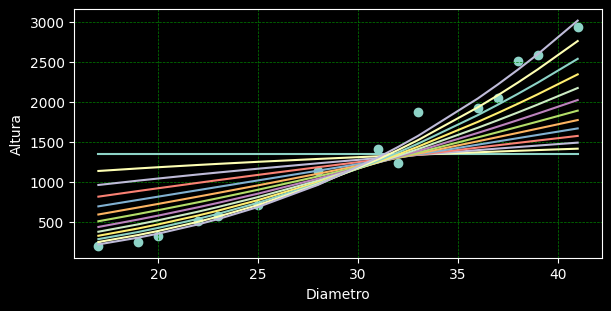

In [15]:
'''
Graficación de nuestro modelo, variandolo con nuestras constantes calculadas arriba

'''
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')  
ax.set_title("")
ax.set_xlabel('Diametro')
ax.set_ylabel('Altura')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.scatter(d,h)
ax.plot(d, test2(d,k1,b[0]))
ax.plot(d, test2(d,k2,b[1]))
ax.plot(d, test2(d,k3,b[2]))
ax.plot(d, test2(d,k4,b[3]))
ax.plot(d, test2(d,k5,b[4]))
ax.plot(d, test2(d,k6,b[5]))
ax.plot(d, test2(d,k7,b[6]))
ax.plot(d, test2(d,k8,b[7]))
ax.plot(d, test2(d,k9,b[8]))
ax.plot(d, test2(d,k10,b[9]))
ax.plot(d, test2(d,k11,b[10]))
ax.plot(d, test2(d,k12,b[11]))
ax.plot(d, test2(d,k13,b[12]))
plt.show()

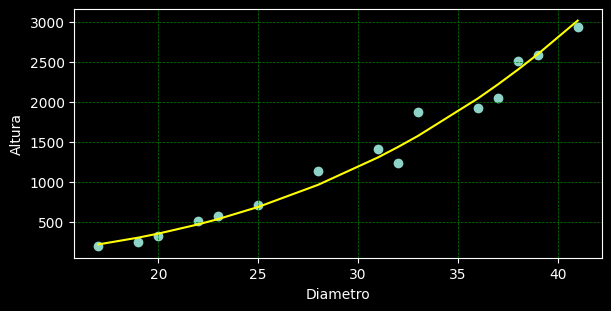

In [32]:
#Graficación de nuestro modelo, variandolo con nuestras constantes de arriba 
# k = 0.04383680419982719   y   b = 3.0
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')  
ax.set_title("")
ax.set_xlabel('Diametro')
ax.set_ylabel('Altura')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.scatter(d,h)
ax.plot(d, test2(d,k13,b[12]), 'Yellow')
plt.show()

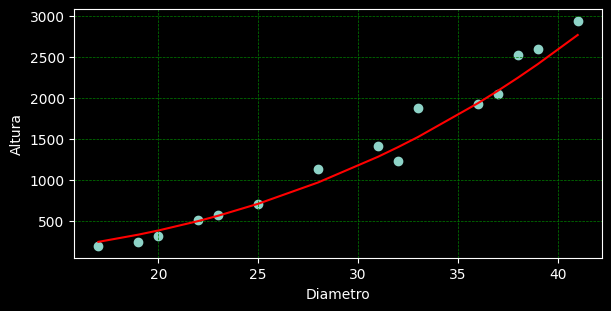

In [33]:
#Graficación de nuestro modelo, variandolo con nuestras constantes de arriba 
# k = 0.10152855167524398  y   b = 2.75
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')  
ax.set_title("")
ax.set_xlabel('Diametro')
ax.set_ylabel('Altura')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.scatter(d,h)
ax.plot(d, test2(d,k12,b[11]), 'Red')
plt.show()

Ya que logramos visualizar las gráficas. Vamos a elegir la curva que cumpla con estar más pegada a los puntos a lo largo de todos los diametros medidos. Primeramente podemos descartar las primeras 10 curvas por que no alcanzan a ajustar los últimos puntos. Vemos esto con una gráfica

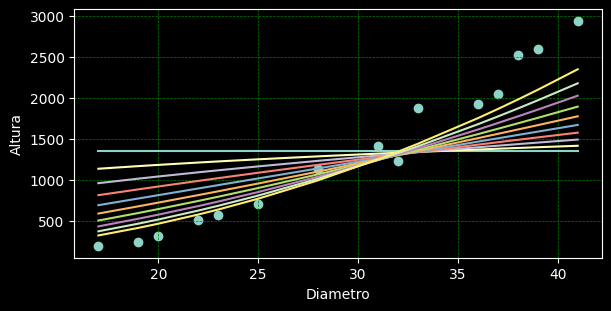

In [18]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')  
ax.set_title("")
ax.set_xlabel('Diametro')
ax.set_ylabel('Altura')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.scatter(d,h)
ax.plot(d, test2(d,k1,b[0]))
ax.plot(d, test2(d,k2,b[1]))
ax.plot(d, test2(d,k3,b[2]))
ax.plot(d, test2(d,k4,b[3]))
ax.plot(d, test2(d,k5,b[4]))
ax.plot(d, test2(d,k6,b[5]))
ax.plot(d, test2(d,k7,b[6]))
ax.plot(d, test2(d,k8,b[7]))
ax.plot(d, test2(d,k9,b[8]))
ax.plot(d, test2(d,k10,b[9]))
plt.show()

De la gráfica de arriba podemos descartar esas funciones por que no alcanzar a modelar los datos para diametros de longitud mayores a 35. Lo que sigue es acotar nuestro ajuste para constantes entre 2.25 y 3.0. Volvemos a generar un conjunto de puntos entre 2.25 y 3.0 con saltos de .10

In [19]:
#Generando posibles exponentes para poder ajustar nuestros datos, limitando las constantes entre 2.25 y 2.95
u = np.arange(start=2.25, stop=3.0, step=0.10)
u

array([2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95])

In [20]:
'''
Y repetimos el proceso hecho arriba.
'''
c0 = np.mean(h/d**u[0])
c1 = np.mean(h/d**u[1])
c2 = np.mean(h/d**u[2])
c3 = np.mean(h/d**u[3])
c4 = np.mean(h/d**u[4])
c5 = np.mean(h/d**u[5])
c6 = np.mean(h/d**u[6])
c7 = np.mean(h/d**u[7])

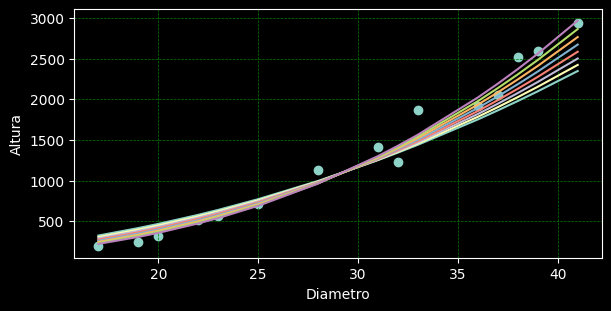

In [21]:
'''
Graficmaos las contantes obtenidas
'''
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')  
ax.set_title("")
ax.set_xlabel('Diametro')
ax.set_ylabel('Altura')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.scatter(d,h)
ax.plot(d, test2(d,c0,u[0]))
ax.plot(d, test2(d,c1,u[1]))
ax.plot(d, test2(d,c2,u[2]))
ax.plot(d, test2(d,c3,u[3]))
ax.plot(d, test2(d,c4,u[4]))
ax.plot(d, test2(d,c5,u[5]))
ax.plot(d, test2(d,c6,u[6]))
ax.plot(d, test2(d,c7,u[7]))

plt.show()

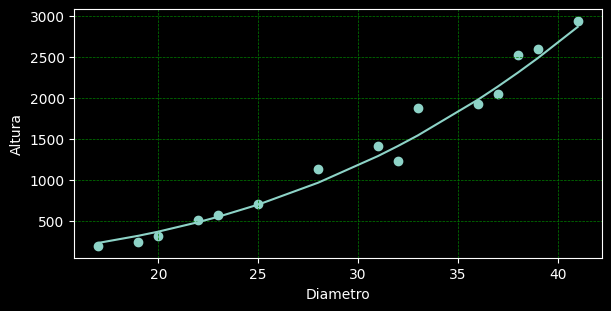

In [22]:
'''
Gráfico por separado tomando la constante b = 2.8500000000000005 y K = 0.07251924363252212
'''
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')  
ax.set_title("")
ax.set_xlabel('Diametro')
ax.set_ylabel('Altura')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.scatter(d,h)
ax.plot(d, test2(d,c6,u[6]))
plt.show()

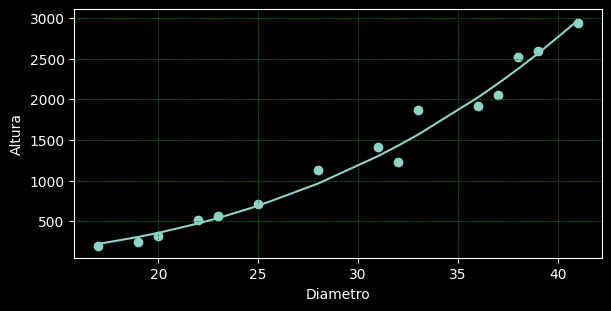

In [23]:

'''
Gráfico por separado tomando la constante b = 2.9500000000000006 y K = 0.05183598358120958
'''
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')  
ax.set_title("")
ax.set_xlabel('Diametro')
ax.set_ylabel('Altura')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.scatter(d,h)
ax.plot(d, test2(d,c7,u[7]))
plt.show()

Si elegimos $b = 2.8500000000000005 $  y $ k =  0.07251924363252212$. Tendremos la siguiente Ecuación:
$$ y  = kx^{b}$$
$$ y  = ( 0.07251924363252212)x^{2.8500000000000005}$$
Para validar nuestro modelo, lo vamos a probar con nuestros datos


In [24]:
'''
Escribiendo nuestra Modelo como función en Python
'''
def Model2(x):
    return ( 0.07251924363252212)*(math.pow(x,2.8500000000000005))

for i in range(len(d)):
    print('Diametro: ' , d[i], 'Altura: ', Model2(d[i]))


Diametro:  17 Altura:  232.93389657633216
Diametro:  19 Altura:  319.81661957339435
Diametro:  20 Altura:  370.15937520841356
Diametro:  22 Altura:  485.6885957968314
Diametro:  23 Altura:  551.2868058260086
Diametro:  25 Altura:  699.1692034391978
Diametro:  28 Altura:  965.7254022023936
Diametro:  31 Altura:  1290.7261033987777
Diametro:  32 Altura:  1412.9627218315056
Diametro:  33 Altura:  1542.4745049568185
Diametro:  36 Altura:  1976.584534608949
Diametro:  37 Altura:  2137.1164115213983
Diametro:  38 Altura:  2305.8790107292293
Diametro:  39 Altura:  2483.06104042311
Diametro:  41 Altura:  2863.434527811208


Con estos resultados, para los paramétros elegidos podemos concluir que es el modelo que mejor ajusta a nuestros datos, ya que la diferencia de errores es la más pequeña entre los valores originales y aproximados. Veamos esta cuestión de los errores


In [27]:
#Error relativo correspodiente a los parámetros elegidos arriba
error_relativo_1 = [(Model2(d[i]) - h[i])/ h[i] for i in range(len(d))]
error_relativo

[0.22596787671753768,
 0.27926647829357737,
 0.1567480475262924,
 -0.04766942000621293,
 -0.03283016521752874,
 -0.01525464304338344,
 -0.14537575026336846,
 -0.08459141602923567,
 0.14875018035081758,
 -0.1751473235525035,
 0.02947111177549431,
 0.04249581049824306,
 -0.08496864653602011,
 -0.041289173581810744,
 -0.026042677615235297]

Podemos notar que los errores son muy pequeños. Y estos son los más chicos en comparación a los otros pares de constantes obtenidas

Para el otro modelo la idea es casi la misma, solo que en el caso $y \propto (x+ 2)$ no tendremos que iterar otro término por que no existen más terminos que puedan ir cambiando. Trabajando con la siguiente ecuación 
$$ y = c(x+2) \implies \frac{y}{x + 2} = c $$. De esta forma calculamos el valor de $c$ por cada par de datos Altura- Diametro y sacamos el promedio de estos

In [28]:
#Cargamos nuestros datos en listas
diametro = [17,19,20,22,23,25,28,31,32,33,36,37,38,39,41]
altura = [190,250,320,510,570,710,1130,1410,1230,1870,1920,2050,2520,2590,2940]
#Transformamos nuestros listas a numpy arrays para una mejor manipulación de los datos
d = np.array(diametro)
h = np.array(altura)
#Obtención de constantes
constantes = h / (d + 2)
promedio_c = np.mean(constantes)

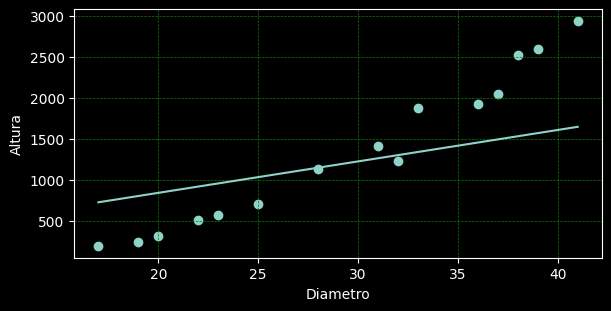

In [29]:
#Graficación
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(6, 3.0), layout='constrained')  
ax.set_title("")
ax.set_xlabel('Diametro')
ax.set_ylabel('Altura')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.scatter(d,h)
ax.plot(d, test1(d, promedio_c))
plt.show()

Con la gráfica de arriba notamos que el modelo $y = a(x+ 2)$ no ajusta bien nuestros datos por eso, elegimos el modelo $y \propto x^b$ con los parámetros encontrados anteriormente

#### b)

In [39]:
'''
calcule la altura de un pino de dicha especie cuyo diámetro es de 65 centímetros.
Como el modelo está en pulgadas. Vamos a hacer la conversión de 65cm ----> pulgadas
65cm = 25.5906 pulgadas
'''
print(f'La altura de un pino con diámetro de 65cm  es de {Model2(25.5906)}')

La altura de un pino con diámetro de 65cm  es de 747.2786957670259


#### c) 

**Interpretación Del Modelo**


Lo primero que podemos decir del modelo es que a medida que el diámetro aumenta la altura del árbol también lo hará, es decir no va a pasar que la altura de un árbol disminuya drasticamente a medida que el diámetro crece. 

Otra observación importante que notamos al ver la gráfica es que con valores muy pequeños la altura crece muy poco en comparación a un diámetro más grande.

##### Extra Ejercicio 2

Para ajustar el modelo en este ejercicio, pudimos haber usado una función llamada **curve_fit**, solamente le debes dar los datos de entrada correctos para que la salida sean los parametros. A continuación se presenta como usar esta función 

In [40]:
'''
Cargando los datos y tranformandolo a un dataframe para mejor manipulación 
'''
diametro = [17,19,20,22,23,25,28,31,32,33,36,37,38,39,41]
altura = [190,250,320,510,570,710,1130,1410,1230,1870,1920,2050,2520,2590,2940]
datos =  {'Diametro':diametro, 'Altura':altura}
df = pd.DataFrame(datos)
df

'''
Modelo 2 
'''
def test2(x, b,c):
    return b*((x)**c)
'''
Ajustamos el modelo 
'''
param2, param_cov2 = curve_fit(test2,df['Diametro'], df['Altura'] )
print("Sine function coefficients:")
print(param2)

Sine function coefficients:
[0.07490765 2.85013297]


Al usar esta función obtuvimos que los parámetros que mejor se ajustan a nuestro modelo son 
$b = 0.07490765 $ y $c = 2.85013297$. Procedemos a graficar

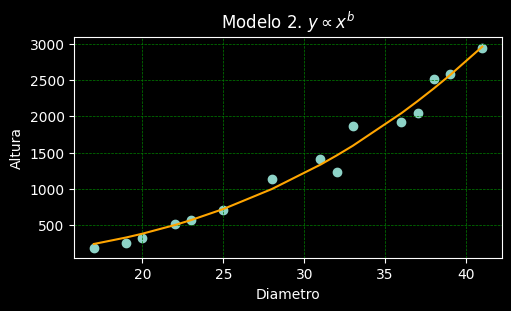

In [38]:
x = df['Diametro']
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(5, 3.0), layout='constrained')  
ax.set_title("Modelo 2. $y \propto x^b$")
ax.set_xlabel('Diametro')
ax.set_ylabel('Altura')
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.scatter(df['Diametro'],df['Altura'])
ax.plot(x, test2(x, param2[0], param2[1]),'orange')
plt.show()

Con los parametros obtenidos con nuestro método inicial podemos notar que las constantes obtenidas no se alejan mucho del ajuste obtendio por **curve_fit** 

## Ejercicio 3

Consideremos un problema de la vida cotidiana: la **distancia de frenado vehicular**. Digamos que conduces su auto a cierta velocidad, y luego necesitas detenerse por completo. La distancia de frenado $D$ es la distancia que seguirá conduciendo después de intentar detenerse. La tabla muestra datos de la dependencia de $D$ en $v$ según el Código de Virginia actual (Jernigan & Kodaman 2001). El conocimiento de la distancia de frenado $D$ es relevante para mantener una buena distancia con el automóvil que está frente a usted. ¿Cómo es posible modelar la dependencia de $D$ en $v$? En particular, ¿cómo podemos derivar una fórmula para $D(v)$ que podamos usar fácilmente?


|$v$|10|15|20|25|30|35|40|45|50|55|60|65|70|75|80|85|90|95|100|
|-|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|--|---|
|$D$|27|44|63|85|109|135|164|195|229|265|303|344|387|433|481|531|584|639|696|

Realiza la gráfica de la distancia de frenado total $D$ (en pies) en función de la velocidad $v$ de un automóvil (en mph). </br>
¿Esta gráfica es idenoea para una función lineal?

In [2]:
'''
Cargando los datos. Almacenamos los datos de velocidad y distancia de frenado
'''
v = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
D = [27,44,63,85,109,135,164,195,229,265,303,344,387,433,481,531,584,639,696,]

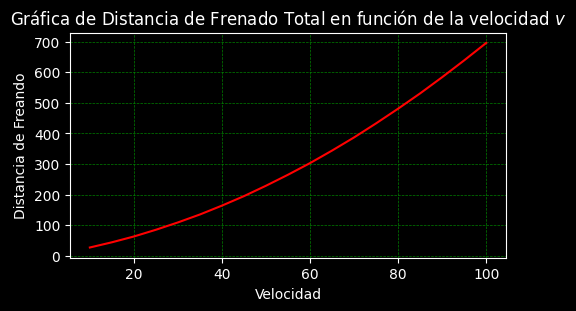

In [3]:
'''
Gráfica de distancia de Frenado Total en función de la velcoidad
'''
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(5, 3.0), layout='constrained') 
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.plot(v, D, 'Red')  
ax.set_xlabel('Velocidad')
ax.set_ylabel('Distancia de Freando')
ax.set_title("Gráfica de Distancia de Frenado Total en función de la velocidad $v$")
plt.show()

**Reespuesta:** La gráfica no es idonea para una función lineal por qué se aprecia cierta curvatura en la curva y no existe una proporción común para una recta entre las variables relacionadas

Ahora grafica la razón entre la distancia de frenado total $D$ (en pies) y la volocidad $v$ en función de la velocidad $v$ de un automóvil (en mph).

In [4]:
'''
Aquí creamos una lista que tiene como datos a la razón entre la distancia y la velocida. Con ayuda de la lista comprimida
'''
razon =  [D[i]/v[i] for i in range(len(D))]

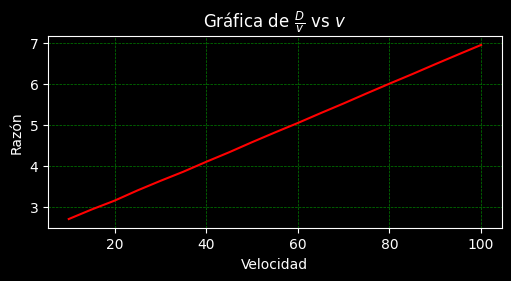

In [5]:
#Graficación  de la razón de la distancia de frenado y la velocidad en función de la velocidad
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')  # Create a figure containing a single axes.
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.plot(v, razon, 'Red')  # Plot some data on the axes.
ax.set_xlabel('Velocidad')
ax.set_ylabel('Razón')
ax.set_title(r'Gráfica de $\frac{D}{v}$ vs $v$')
plt.show()

Esta es una forma de ver las desviaciones de una función lineal. Este enfoque implica la suposición de que $D$ es proporcional a $v$. Este enfoque es correcto ya que $D$ debe ser igual a cero para $v  = 0$.
Veamos que si usamos la fórmula de dos puntos
$$Y = y_1\frac{x-x_2}{x_1-x_2}+y_2\frac{x-x_1}{x_2-x_1}$$
combinado con los puntos $(15, 44/15)$ y $(95, 639/95)$, obtenemos 
 $$D  = (2.2 + v/21) v$$
 
Elabora en el procedimiento necesario para la deducción de esta igualdad (Puedes usar python para las cuentitas)

Por simplicidad usemos la función
$$D=\left(2+\frac{v}{20}\right)v\tag{0}$$
De nuevo, la razón principal para hacer esto es que estamos interesados en un modelo que se pueda aplicar fácilmente para el cálculo de $D$. Grafica esta función y también los datos de la tabla.

Comenzamos sustituyendo,tomando en cuenta que: $\left(x_1,y_1\right)=\left(15, \frac{44}{15}\right)$ y $\left(x_2,y_2\right)=\left(95, \frac{639}{95}\right)$.Además usamos la fórmula de dos puntos
$$ \frac{D}{v} = y_1\frac{x-x_2}{x_1-x_2}+y_2\frac{x-x_1}{x_2-x_1} $$
$$ \frac{D}{v} = \left(\frac{44}{15}\right)\frac{v-95}{15-95}+\left(\frac{639}{95}\right)\frac{v-15}{95-15} $$
$$ \frac{D}{v} = \left(\frac{44}{15}\right)\frac{v-95}{-80}+\left(\frac{639}{95}\right)\frac{v-15}{80} $$
$$ \frac{D}{v} = \frac{44v-4180}{-1200}+\frac{639v-9585}{7600} $$

Se desarrola la suma de lado derecho:


$$ \frac{D}{v} = \frac{(44v-4180)(7600) + (-1200)(639v-9585)}{-9120000} $$
$$ \frac{D}{v} = \frac{(334400v-31768000) + (11502000 - 766800v )}{-9120000} $$
$$ \frac{D}{v} = \frac{-432400v-20266000}{-9120000}  = \frac{432400v+20266000}{9120000} $$
$$ \frac{D}{v} = \frac{432400v}{9120000}  + \frac{20266000}{9120000} =\frac{1081v}{22800} + 2.22  = 0.047412v + 2.22$$
Por lo tanto al de spejar $D$
$$D = \left(0.047412v + 2.22\right)v\approx  (2.2 + v/21) v$$

In [6]:
'''
Cargando los datos de las velocidades de la tabla de arriba
'''
v = [10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
'''
En D_aproximado se almacenan los datos de acuerdo al modelo de la Ecuación 0. Con ayuda de lista Comprimida
'''
D_aproximado = [v[i]*(2 + v[i]/20) for i in range(len(D))]

In [7]:
'''
Visualizamos los datos
'''
print(D_aproximado)

[25.0, 41.25, 60.0, 81.25, 105.0, 131.25, 160.0, 191.25, 225.0, 261.25, 300.0, 341.25, 385.0, 431.25, 480.0, 531.25, 585.0, 641.25, 700.0]


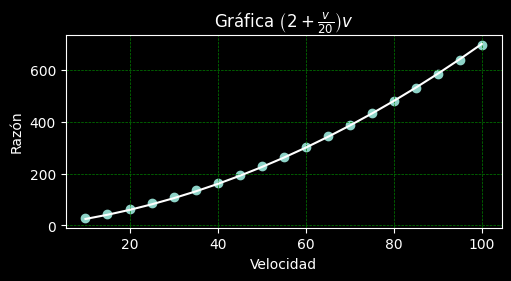

In [8]:
'''
Graficamos El modelo en función de v
'''
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')  
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.plot(v, D_aproximado, 'white') # Gráfico de la función 
ax.scatter(v,D) # Gráfico de los datos
ax.set_xlabel('Velocidad')
ax.set_ylabel('Razón')
ax.set_title(r'Gráfica $\left(2+\frac{v}{20}\right)v$')
plt.show()

**Evaluación del modelo.**</br>  
¿Es éste un buen modelo para los datos? </br>

**Respuesta:**


Podemos afirmar que es un buen modelo por que la curva que describe el modelo se ajusta bien a nuetros datos, es decir no pasa que los datos se alejen mucho de la función.


¿La tendencia de los datos está bien representada y existe una buena concordancia entre el modelo y los puntos de datos?. </br> 

**Respuesta:**


Hay concordancia entre el modelo y los puntos de los datos por que en la gráfica se puede notar que los puntos están quedando encima de la gráfica. De esta forma al evaluar nuestros datos en la función podemos apreciar que los resultados de la salida de la función son semejantes a los datos que tenemos de la tabla proporcionada.


La precisión de la Ec. (0) se puede evaluar considerando su error relativo $e$. 
Grafique el error relativo.

Recordando la ecuación del error relativo
$$\text{Error Relativo} = \frac{\text{Error Absoluto}}{\text{valor verdadero}}$$
Con $\text{Error Absoluto} = \text{valor aproximado} - \text{valor verdadero}$

In [9]:
#En esta linea de código, llenamos una lista nombrada 'error_relativo', donde sus entradas se calculan de la siguiente manera
'''
(D_aproximado[i] - D[i])/D[i]
De esta forma D_aproximado[i] corresponde al i-ésimo elemento de los datos aproximados y D[i] a los valores reales. Ya que
accedemos a esos datos correspondemos a hacer la operación para calcular el error relativo. 
Se usa lista comprimida para ir llenando el arreglo. Iterando a lo largo de la longitud de D.
Haciendo uso de la ecuación del error relativo descrita arriba hacemos el cálculo correspondiente
'''
error_relativo = [(D_aproximado[i] - D[i])/D[i] for i in range(len(D))]

In [10]:
'''
Mandamos a imprimir los errores relativos
'''
print(error_relativo)

[-0.07407407407407407, -0.0625, -0.047619047619047616, -0.04411764705882353, -0.03669724770642202, -0.027777777777777776, -0.024390243902439025, -0.019230769230769232, -0.017467248908296942, -0.014150943396226415, -0.009900990099009901, -0.007994186046511628, -0.00516795865633075, -0.0040415704387990765, -0.002079002079002079, 0.00047080979284369113, 0.0017123287671232876, 0.0035211267605633804, 0.005747126436781609]


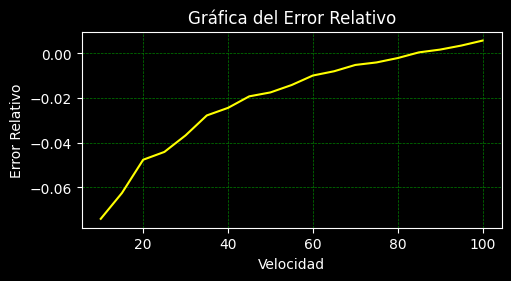

In [11]:
'''
Gráficación del Error Relativo
'''
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')  # Create a figure containing a single axes.
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
ax.plot(v,error_relativo, 'Yellow')  # Plot some data on the axes.
ax.set_xlabel('Velocidad')
ax.set_ylabel('Error Relativo')
ax.set_title(r'Gráfica del Error Relativo')
plt.show()

¿Qué sucede con el error a medida que la velocidad aumenta?</br> 

**Respuesta:**

El error aumenta a medida que la velocidad aumenta.



¿Para que velocidades nos es "más importante" saber la distancia de frenado? 

**Respuesta:**

Podemos pensar en la velocidad donde el error relativo es cero. A partir de esa $v_0$ podemos proponer un radio $\delta > 0$ lo suficientemente pequeña de tal forma que los errores que  están dentro de esa vecindad sean muy parecidos a 0. La vecindad tiene esta forma:
$$(v_0 - \delta, v_0 + \delta)$$
Por lo tanto las velocidades donde nos interesaría conocer la distancia de frenado son el complemento de la vecindad descrita arriba. Es decir el intervalo de este tipo:

$$ (-\infty, v_0 + \delta)\cup (v_0 + \delta ,\infty)$$


El modelo es simple, lo cual es útil para usarlo en el cálculo de las distancias de frenado, incluidas las velocidades que son más altas que el rango de $v$. ¿Es comprensible el modelo? Podemos esperar que D dependa, básicamente, linealmente de v. ¿Por qué observamos una contribución cuadrática $v^2$ en la Ec. (0)? La distancia de frenado D debe depender de la energía cinética $mv^2 /2$ del automóvil ($m$ es la masa del automóvil): cuanto mayor sea la energía cinética, más tiempo tardará en detenerse. Por lo tanto, una dependencia cuadrática de $D$ en $v$ es razonable.

**Respuesta:**

Sí es comprensible ya que describe correctamente nuestros datos, adempas de ser bastante entendible. Y se observa una contribución cuadrática gracias a la Energía cinética. Por que:

$$ E_c = \frac{mv^{2}}{2}$$
De la ecuación de la energía cinética podemos garantizar la dependencia cuadrática de $D$ en $v$
